**Section 8: Clusters**

Notebook for "Introduction to Data Science and Machine Learning"

version 1.1, June 17 2025



# 1.  Preparations

The path of data files:

In [1]:
dataFilesPath="data/"

`import` statements required for this notebook.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

And import some functions written for this notebook:

In [3]:
from modules.ClusterFunctions import * 

The function `plotClusters()` plots clusters with the centers.

In [4]:
help(plotClusters)

Help on function plotClusters in module modules.ClusterFunctions:

plotClusters(df, model, legend='auto', draw_center=False, annotate_centers=False, save=False, file='file', path='plots/')
    Function to plot the clusters:
    Parameters:
    df - is the data. It is specified in form of a pandas data frame
    model - is the trained model. It is an instance of the KMeans estimator trained with the data
    legend - if legend is set to False, no legend is drawn
    draw_center - if this parameter is set to True, the centers of the learned clusters are drawn
    annotate_centers - if set to True, the cluster means are annotated with cluster number and
                       an arrow
    save - if set to True the plot will be saved
    file - if save is True, the plot will be saved to a file named file.png



# 2. Introduction

In this notebook you will work with **k-means clustering**. Contrary to the algorithms we discussed so far in the practical sessions (regression and different classification algorithms), **clustering** is an unsupervised learning algorithm , i.e. our data is not labeled. 

Therefore the main task of this assignment is to learn different clusters for different data sets and observe the influence of $k$. We will equally use the propsed graphical method to create an elbow plot and make an estimate for $k$.

# 3. Cluster Analysis

First we load the data frame and use a `pandas` function:

In [5]:
df=pd.read_csv(dataFilesPath+'example1_data.csv')

In order to get to know the data, we create a simple scatter plot.

Text(0, 0.5, 'feat02')

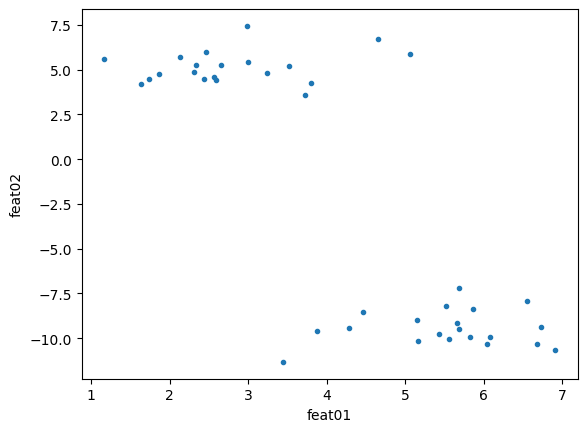

In [6]:
# retrieve the columns names
cols=df.columns
# plot the data
plt.plot(df[cols[0]],df[cols[1]],'.')
# label the x and y axis with the column names    
plt.xlabel(cols[0])
plt.ylabel(cols[1])

In this notebook we will always set the `random_state` to have reproducible states.

## 3.1 Using default values

The result of the clustering depends on the initial centroids (cluster centers). Those are selected randomly by `KMeans`. The clustering process is repeated several times with different initial centroids and selects the best result, in terms of *inertia* (sum of squared distances of samples to their closest cluster center) is selected. 

Let's use clustering with the default parameters:

In [7]:
# creation of the KMeans clustering object
kmeans=KMeans(random_state=10)

In [8]:
# training with our data
kmeans.fit(df)

KMeans(random_state=10)

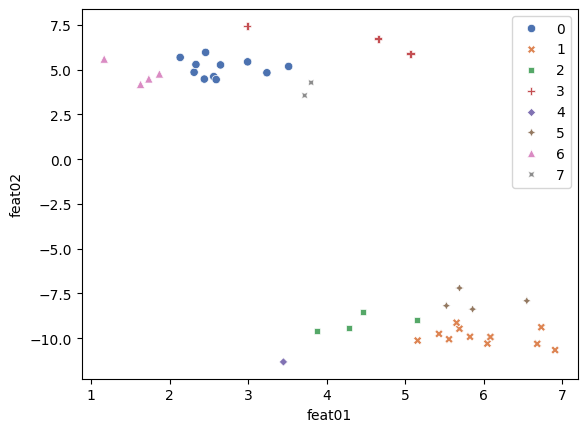

In [9]:
# plotting the results
plotClusters(df=df,model=kmeans)

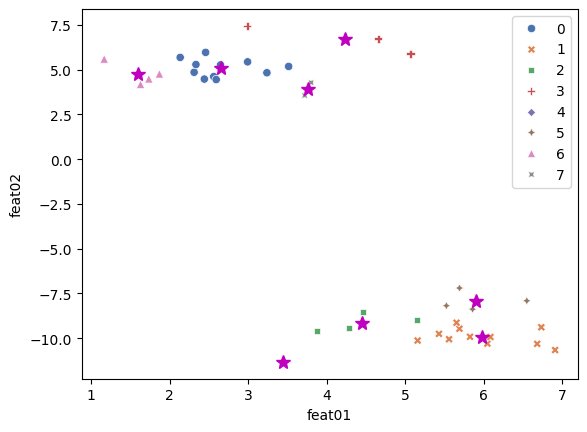

In [10]:
# plotting the results with cluster centers
plotClusters(df=df,model=kmeans,draw_center=True)

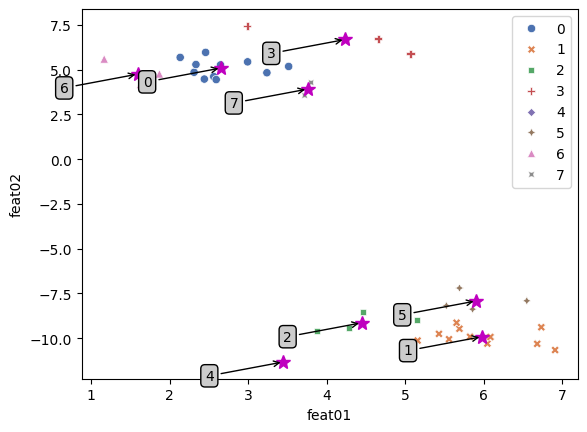

In [11]:
# plotting the results with cluster center and annotations
plotClusters(df=df,model=kmeans,draw_center=True,annotate_centers=True)

Using save=True and a filename (without ending `.png`) you may also save the plot as png file in the folder `plots` .

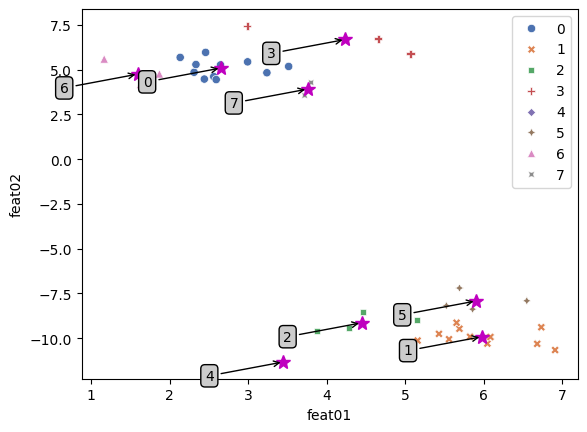

In [12]:
plotClusters(df=df,model=kmeans,draw_center=True,annotate_centers=True, save=True, file="clusters1")

Look at above plot and try to understand how it works.

Consult the [documentation for KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and answer the following questions:

- what is the default value for $k$?
- what is controlled by `init`?
- what is controlled by `n_init`?

## 3.2 Setting the number of clusters

This data can obviously be separated into two clusters. To create a cluster, we first need to crate an instance of the estimator `KMeans`. We specify the number of clusters, i.e.$k$ as well as a random state (to be able to repeat the algorithm with different valus for $k$).

Repeat the training for two clusters.

In [13]:
# Your code
# define an object for KMeans, use random_state=10

Train the model on the data:

In [14]:
# Your code

Plot the results including the cluster centers and annotations.

In [15]:
# Your code

## 3.3 Evaluating the estimator

Now let's look at some information the estimator. The values of the cluster means are stored in `cluster_centers_`: 

In [16]:
print(kmeans.cluster_centers_)

[[  2.65641408   5.09430028]
 [  5.98051142  -9.91875338]
 [  4.44683382  -9.14290319]
 [  4.23781204   6.68605236]
 [  3.44868458 -11.32833331]
 [  5.90689707  -7.92030519]
 [  1.59859507   4.7562169 ]
 [  3.7604487    3.91789462]]


`inertia_` is the sum of squared distances of the samples to the nearest cluster centers. We can try to reduce this sum. Please note that we talk of disctances and not squared errors, as this is an **unsupervised** learning method and we do not know the ground truth.

In [17]:
print(kmeans.inertia_)

17.811816366081352


The overall silhouette coefficient is calculated a using the `silhouette_score()` method.

In [18]:
silhouette=silhouette_score(df, kmeans.fit_predict(df))

Now let's take a look at the result of learning three clusters:

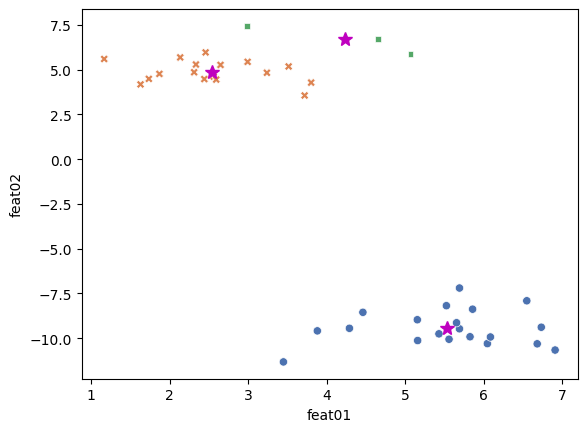

In [19]:
kmeans2=KMeans(n_clusters=3,random_state=10,n_init=10)
kmeans2.fit(df)
plotClusters(df,kmeans2,legend=False,draw_center=True)
silhouette2=silhouette_score(df, kmeans2.fit_predict(df))

In [20]:
print('sum of squared distances (2 clusters):', kmeans.inertia_)
print('sum of squared distances (3 clusters):', kmeans2.inertia_)
print('overall silhouette score (2 clusters):',silhouette)
print('overall silhouette score (3 clusters):',silhouette2)

sum of squared distances (2 clusters): 17.81181636608135
sum of squared distances (3 clusters): 54.40516365660845
overall silhouette score (2 clusters): 0.37495518767623176
overall silhouette score (3 clusters): 0.7027961932700955


The sum of distances was reduced bute the silhouette score was equally reduced. We might equally test four clusters:

sum of squared distances (2 clusters): 17.81181636608135
sum of squared distances (3 clusters): 54.40516365660845
sum of squared distances (4 clusters): 54.40516365660845
overall silhouette score (2 clusters): 0.37495518767623176
overall silhouette score (3 clusters): 0.7027961932700955
overall silhouette score (4 clusters): 0.44502628019437795


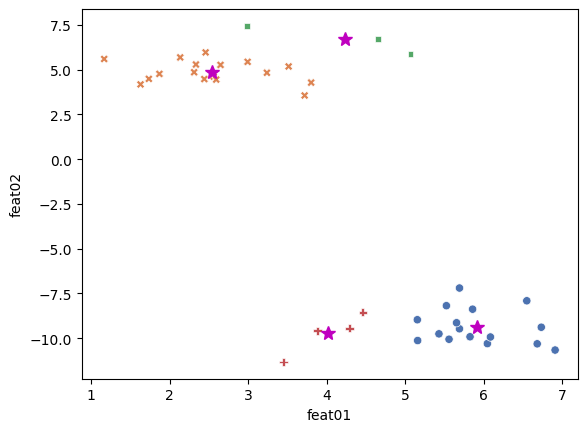

In [21]:
kmeans3=KMeans(n_clusters=4,random_state=10,n_init=10)
kmeans3.fit(df)
plotClusters(df,kmeans3,legend=False,draw_center=True)
silhouette3=silhouette_score(df, kmeans3.fit_predict(df))
print('sum of squared distances (2 clusters):', kmeans.inertia_)
print('sum of squared distances (3 clusters):', kmeans2.inertia_)
print('sum of squared distances (4 clusters):', kmeans2.inertia_)
print('overall silhouette score (2 clusters):',silhouette)
print('overall silhouette score (3 clusters):',silhouette2)
print('overall silhouette score (4 clusters):',silhouette3)

The resulting sum of squared distances is the same but the silhouette score was further reduced. We might now make a test from 1 to 6 clusters. When the number of clusters is set to 1, we get a warning. We simply ignore it. In this case we set the silhouette coefficient to -1, the worst possible value.:

In [22]:
kValues=list(range(1,7))
distances=[]
cummulatedDistancesReduction=[0]
silhouetteCoefficientValues=[]
for k in kValues:
    estimator=KMeans(n_clusters=k,random_state=10,n_init=10)
    estimator.fit(df)
    distances.append(estimator.inertia_)
    if k==1:
        silhouetteCoefficientValues.append(-1)
    else:
        silhouetteCoefficientValues.append(silhouette_score(df, estimator.fit_predict(df)))
for i in range(1,len(kValues)):
    cummulatedDistancesReduction.append(distances[0]-distances[i])
silhouetteCoefficientsDF=pd.DataFrame({"k":kValues,"coefficient":silhouetteCoefficientValues})

And now we plot the result for the ellbow plot:

Text(0, 0.5, 'cummulated distances reduction')

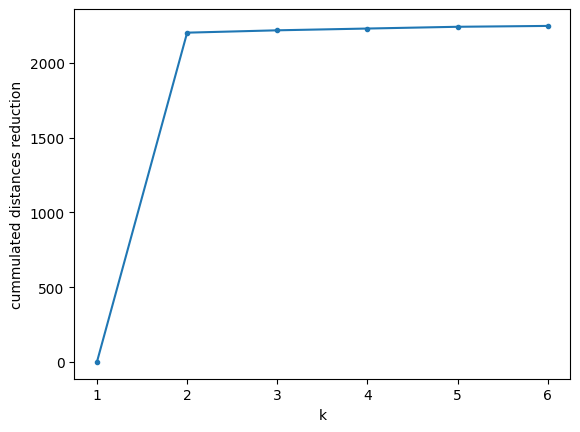

In [23]:
plt.plot(kValues,cummulatedDistancesReduction,'.-')
plt.xlabel('k')
plt.ylabel('cummulated distances reduction')

This "ellbow" plot shows nicely that 2 is a good value for $k$.

Now let's print the silhouette coefficients:

In [24]:
silhouetteCoefficientsDF

,k,coefficient
0,1,-1.000000
1,2,0.886255
2,3,0.702796
3,4,0.445026
4,5,0.467339
5,6,0.397948


Based on the silhouette coefficient 2 is euqally a good value for $k$, the number of clusters,

Information: The data was artifically generated using `sklearn.datasets.make_blobs()` with two cluster centers.

# 4. Exercise

Use above steps to determine the best $k$ for k-means clustering for the data in the files:
- example2_data.csv
- example3_data.csv
- example4_data.csv
- example5_data.csv

In [26]:
# Your code for example2_data.csv
df2=pd.read_csv(dataFilesPath+'example2_data.csv')

In [27]:
# Your code for example3_data.csv
df3=pd.read_csv(dataFilesPath+'example3_data.csv')

In [28]:
# Your code for example4_data.csv
df4=pd.read_csv(dataFilesPath+'example4_data.csv')

In [29]:
# Your code for example5_data.csv
df5=pd.read_csv(dataFilesPath+'example5_data.csv')

*End of the Notebook*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This notebook was created by Christina B. Class for teaching at EAH Jena and is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.